# mobile price prediction dataset

### Context
##### Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

##### He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

##### Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

##### In this problem you do not have to predict actual price but a price range indicating how high the price is

### Libraries Used

In [80]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import os

In [81]:
train_df = pd.read_csv("train.csv", sep=",", encoding="UTF-8")
test_df = pd.read_csv("test.csv", sep=",", encoding="UTF-8")

### Preprocessing

In [82]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [83]:
train_df.shape

(2000, 21)

In [84]:
test_df.shape

(1000, 21)

In [85]:
train_df.duplicated().any()

False

In [86]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [87]:
train_df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

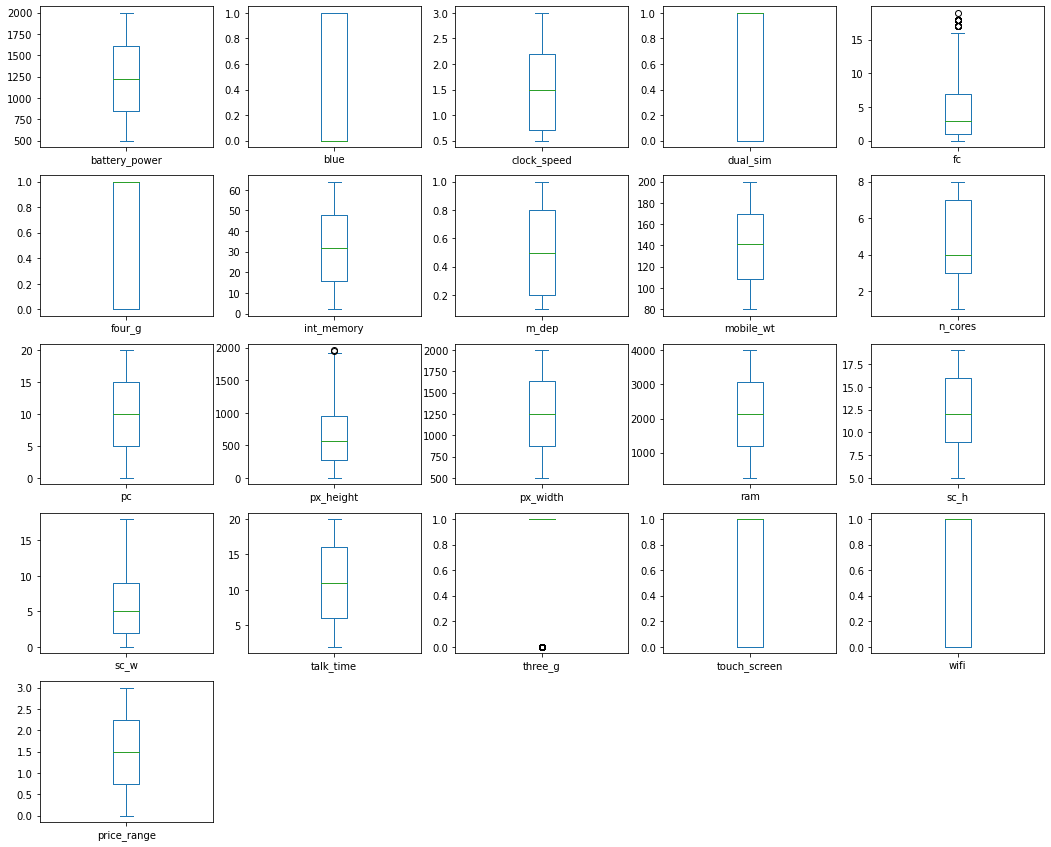

In [88]:
# drawing a box plots for all columns

train_df.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

In [89]:
train_df.fc.value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

In [90]:
def removeOutliers(df, columns, factor=1.5):
    
    for column in columns:
        Q1 = df[column].quantile(0.25) # Lower Bound
        Q3 = df[column].quantile(0.75) # Upper Bound
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

In [91]:
train_df = removeOutliers(train_df, columns=["fc","px_height"])

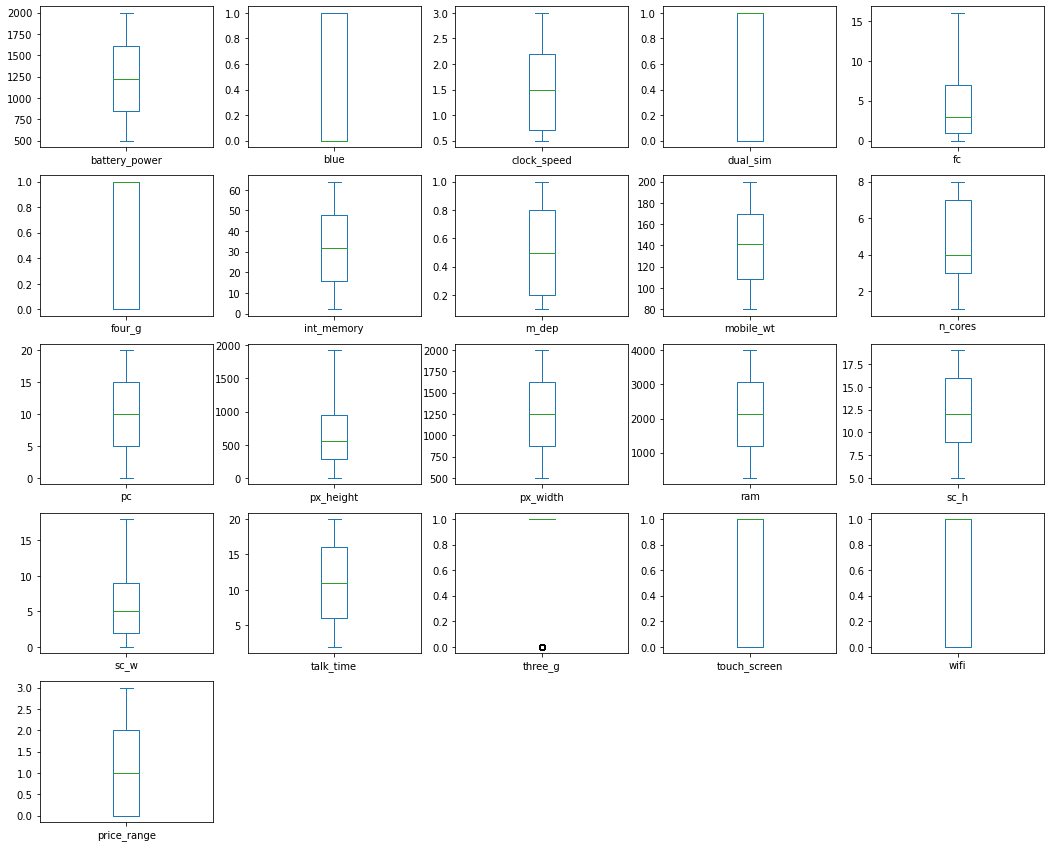

In [92]:
train_df.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

In [93]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [94]:
test_df = removeOutliers(train_df, columns=["fc","px_height"])

In [95]:
train_df.price_range.value_counts()

2    496
0    496
1    495
3    493
Name: price_range, dtype: int64

In [96]:
train_df["price_range"] = train_df["price_range"].replace([0,1,2,3],["below 1000$","below 2000$", "below 3000$", "below 4000$"])

In [97]:
train_df.price_range.value_counts()

below 3000$    496
below 1000$    496
below 2000$    495
below 4000$    493
Name: price_range, dtype: int64

## EDA

<AxesSubplot:title={'center':'Price Range Values'}, ylabel='price_range'>

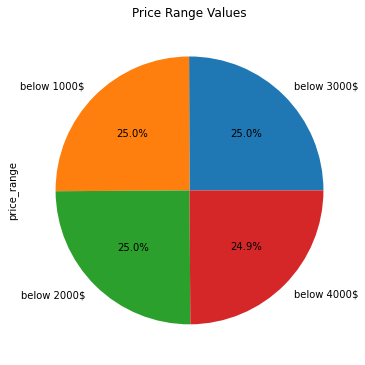

In [98]:
plt.figure(figsize=(6,7))
plt.title("Price Range Values")
round(train_df["price_range"].value_counts()/train_df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

In [99]:
train_df["blue"] = train_df["blue"].replace([0,1],["No","Yes"])

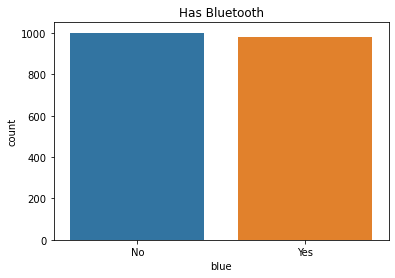

In [100]:
sns.countplot(x= "blue", data=train_df)
plt.title("Has Bluetooth")
plt.show()

<AxesSubplot:title={'center':'Range of Battery Power'}, xlabel='battery_power', ylabel='Count'>

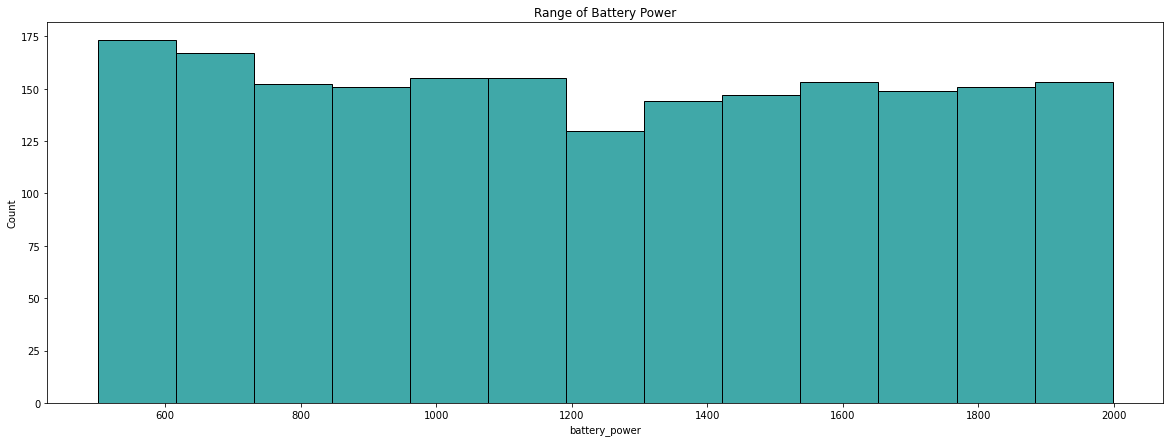

In [101]:
plt.subplots(figsize=(20, 7))
plt.title("Range of Battery Power")
sns.histplot(data=train_df, x=train_df["battery_power"],color= "darkcyan")

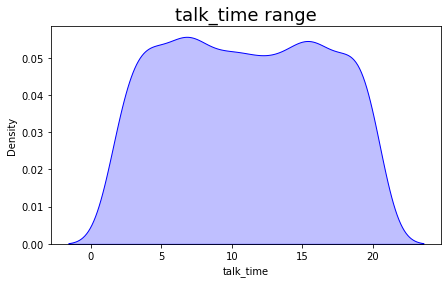

In [102]:
plt.figure(figsize = (7,4))
sns.kdeplot(train_df.talk_time, shade = True, color = "b")
plt.title("talk_time range", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'HeatMap')

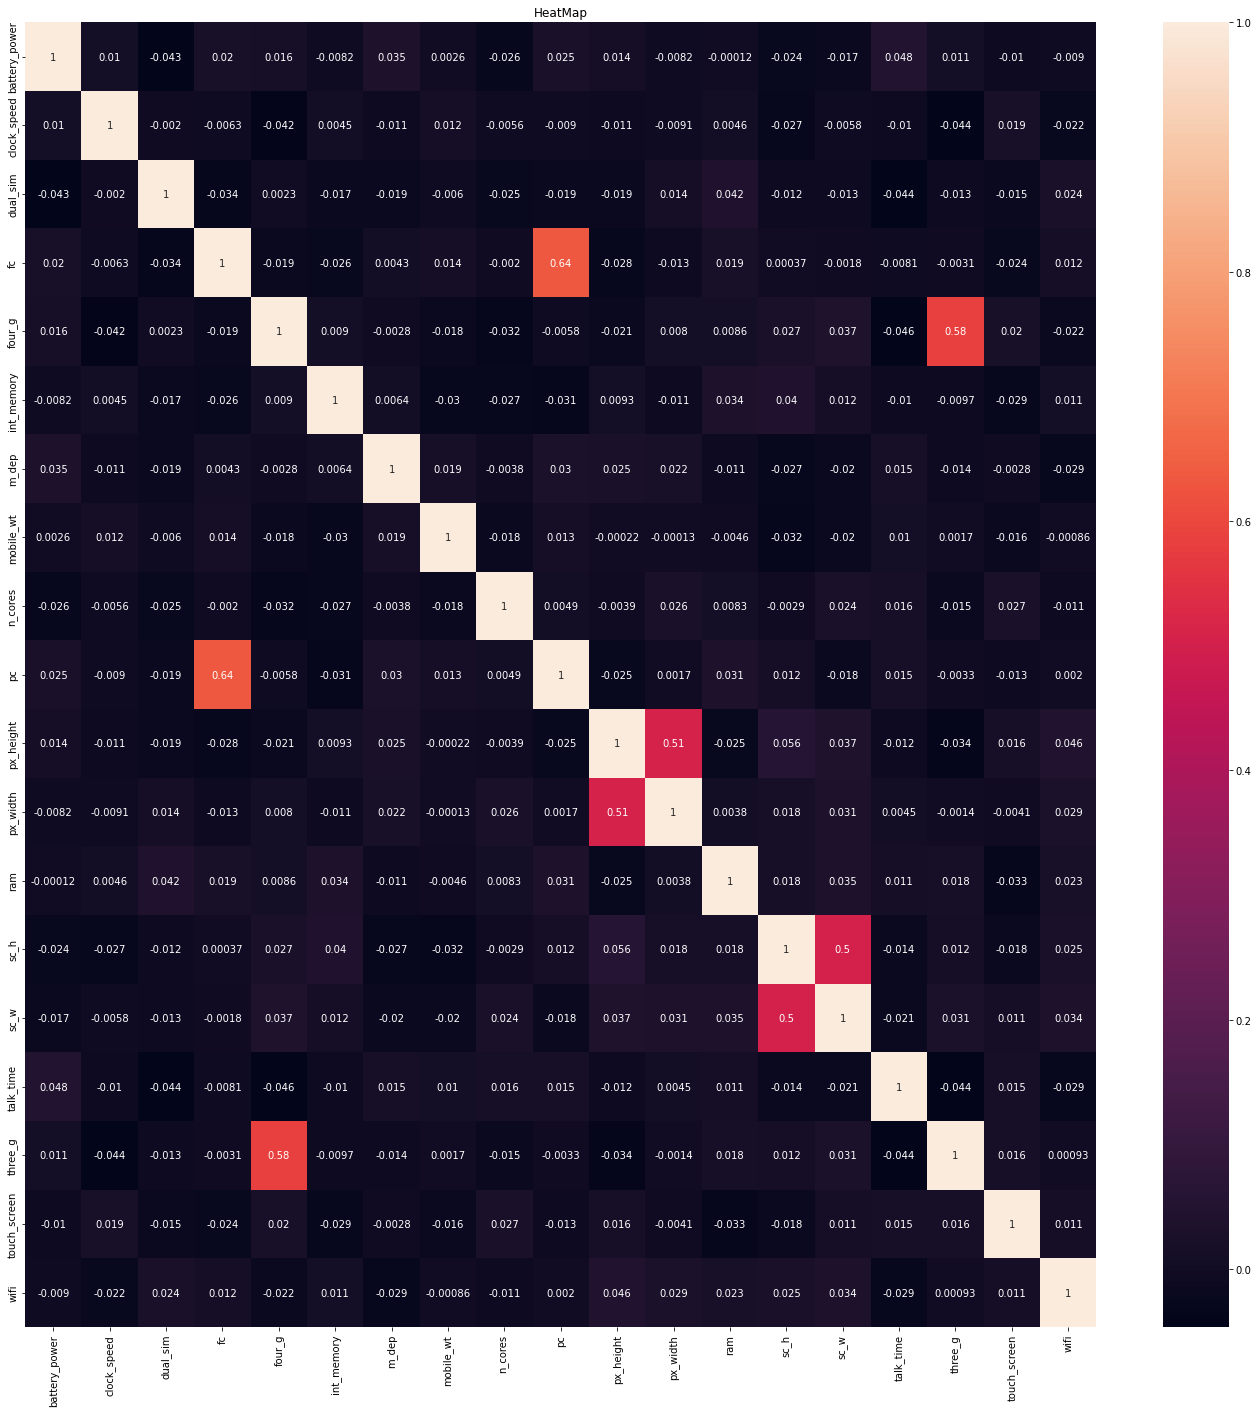

In [103]:
plt.subplots(figsize = (24, 24))
sns.heatmap(train_df.corr(), annot = True)
plt.title("HeatMap")

## Model_Training

In [104]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Transforming The data and creating Ml Models below and Evaluating Them

## All in One Snippet

Logistic Regression Accuracy: 0.9595959595959596
Decision Tree Accuracy: 0.8358585858585859
SVC Accuracy: 0.8686868686868687
Random Forest Accuracy: 0.8787878787878788

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       0.96      0.93      0.94        97
           2       0.93      0.93      0.93        86
           3       0.98      0.97      0.98       106

    accuracy                           0.96       396
   macro avg       0.96      0.96      0.96       396
weighted avg       0.96      0.96      0.96       396


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       107
           1       0.76      0.79      0.78        97
           2       0.72      0.73      0.73        86
           3       0.93      0.87      0.90       106

    accuracy                           0.84       396
   macro avg     

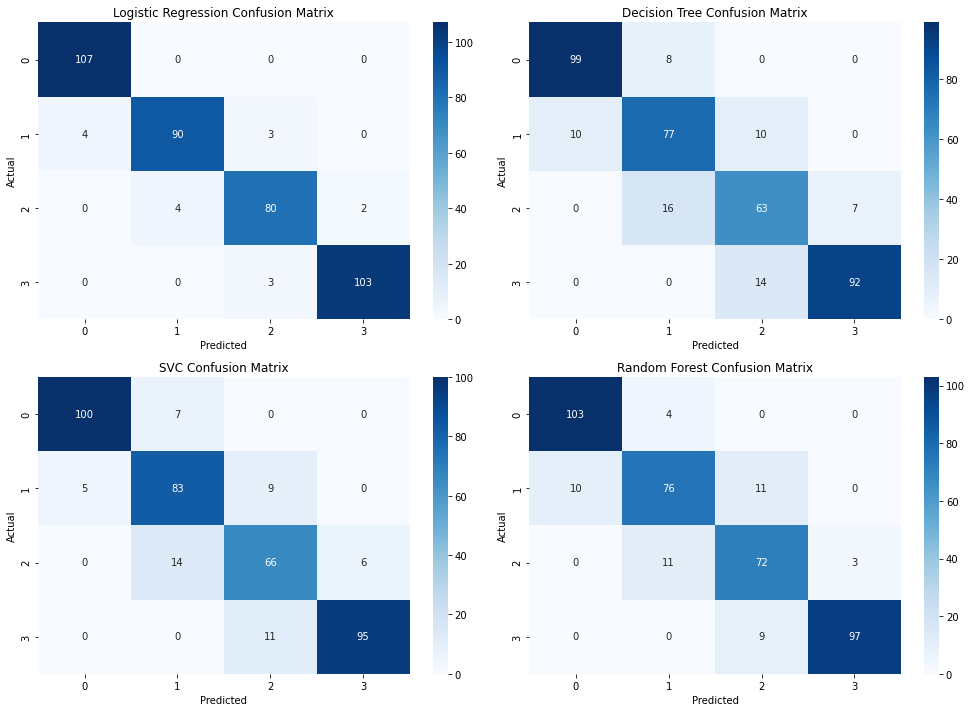

In [134]:
data = pd.read_csv('train.csv')
data = removeOutliers(data, columns=["fc","px_height"])

X = data.drop('price_range', axis=1)  # Features
y = data['price_range']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_model = LogisticRegression(max_iter=1000)
decision_tree_model = DecisionTreeClassifier()
svc_model = SVC()
random_forest_model = RandomForestClassifier()

logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_svc = svc_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))

print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_logistic))
print("\nDecision Tree Report:\n", classification_report(y_test, y_pred_decision_tree))
print("\nSVC Report:\n", classification_report(y_test, y_pred_svc))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_random_forest))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
models = ['Logistic Regression', 'Decision Tree', 'SVC', 'Random Forest']
predictions = [y_pred_logistic, y_pred_decision_tree, y_pred_svc, y_pred_random_forest]

for i, ax in enumerate(axes.flatten()):
    cm = confusion_matrix(y_test, predictions[i])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f'{models[i]} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()


### Best Model was Logistic Regression with almost 96% Accuracy.

# End